<a href="https://colab.research.google.com/github/VictorDu1990/Keras_TensorFlow_DL_demo/blob/master/keras_CNN_mnist_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#一、数据预处理
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
#02.读取mnist数据
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
#03.数据预处理
x_Train4D = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [5]:
#二、建立模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

def LeNet():
	# 定义模型
    model = Sequential()
    # conv1
    model.add(Conv2D(16,(5,5),strides=(1,1),input_shape=(28,28,1),padding='same',activation='relu',kernel_initializer='uniform'))
    # max1
    model.add(MaxPooling2D(pool_size=(2,2)))
    # conv2
    model.add(Conv2D(36,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    # max2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #dropout
    model.add(Dropout(0.25))
    # 多通道压平
    model.add(Flatten())
    # fc1
    model.add(Dense(128,activation='relu'))
    #dropout
    model.add(Dropout(0.5))
    # fc2
    model.add(Dense(10,activation='softmax'))
    return model

model = LeNet()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)  

In [0]:
#三、训练模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train4D_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 66s - loss: 0.5343 - acc: 0.8300 - val_loss: 0.1064 - val_acc: 0.9690
Epoch 2/10
 - 63s - loss: 0.1411 - acc: 0.9577 - val_loss: 0.0701 - val_acc: 0.9782
Epoch 3/10
 - 63s - loss: 0.1031 - acc: 0.9686 - val_loss: 0.0577 - val_acc: 0.9837
Epoch 4/10
 - 63s - loss: 0.0849 - acc: 0.9743 - val_loss: 0.0483 - val_acc: 0.9850
Epoch 5/10
 - 63s - loss: 0.0736 - acc: 0.9782 - val_loss: 0.0427 - val_acc: 0.9876
Epoch 6/10
 - 65s - loss: 0.0632 - acc: 0.9810 - val_loss: 0.0399 - val_acc: 0.9880
Epoch 7/10
 - 64s - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0366 - val_acc: 0.9893
Epoch 8/10
 - 62s - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0348 - val_acc: 0.9900
Epoch 9/10
 - 63s - loss: 0.0446 - acc: 0.9870 - val_loss: 0.0370 - val_acc: 0.9895
Epoch 10/10
 - 63s - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0332 - val_acc: 0.9905


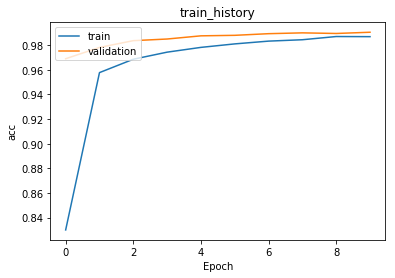

In [0]:
#显示训练过程
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('train_history')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

In [0]:
#四、评估模型准确率
scores = model.evaluate(x_Test4D_normalize, y_Test_OneHot)
scores[1]

10000/10000 [==============================] - 5s 535us/step


0.9925

In [0]:
#五、进行预测
prediction = model.predict_classes(x_Test4D_normalize)

import pandas as pd
pd.crosstab(x_label_test_OneHot, prediction, rownames=['labels'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,0,0,0,1,0
2,1,1,1023,0,1,0,0,3,3,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,978,0,0,0,2,2
5,1,0,0,4,0,885,1,0,0,1
6,2,3,0,0,3,2,947,0,1,0
7,0,3,1,2,0,0,0,1018,1,3
8,2,0,1,1,0,1,0,0,969,0
